# Assignment - Support Vector Machine

## Handwritten Digit Recognition

#### Objective
- Build a model using Support Vector Machine which correctly classify the handwritten digits from 0-9 based on the pixel values given as features.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding and Cleaning

In [2]:
# libraries

import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Model building
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# For metric evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For Cross validation and regularization model building
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# For scaling
from sklearn.preprocessing import scale

#### Reading data

In [3]:
# Reading data from dataset
digit_df = pd.read_csv("C:/PGDDS/Machine_learning/Predictive_Analytics_II/SVM/train.csv")
digit_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Data Understanding

#### Distribution of data on full dataset

In [4]:
digit_df['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

#### Visualising the distribution of data on full dataset

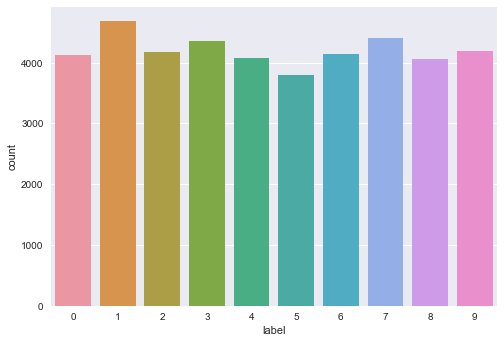

In [5]:
sns.countplot(digit_df["label"])
plt.show()

### <span style="color:blue">Problem Statement requirement</span>
Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM on the full MNIST data, so extracting 20% of the data from the original dataset.

#### Extracting 20% data from the original dataset

In [6]:
# Extracting 20% data from the original dataset
digit_recognizer = digit_df.sample(frac = 0.2, random_state=42)

<span style="color:red">__digit_recognizer dataframe contains sub-sample i.e. 20% of original data.__</span> Taking this dataframe as base for the further operations.

#### Distribution of data on sub-sampled (20% data) dataset

In [7]:
digit_recognizer['label'].value_counts().sort_index()

0    816
1    909
2    846
3    937
4    839
5    702
6    785
7    893
8    835
9    838
Name: label, dtype: int64

#### Visualising the distribution of data on sub-sampled (20% data) dataset

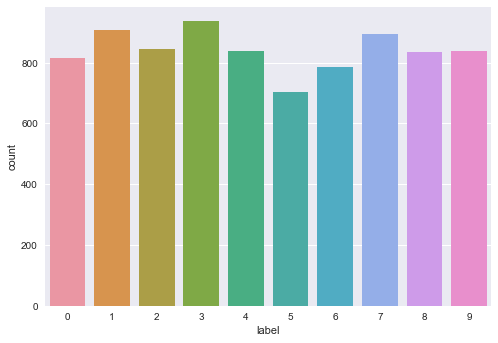

In [8]:
sns.countplot(digit_recognizer["label"])
plt.show()

Distribution of data in full dataset containing 42000 image pixel values and sub-sample data(20% data) containing 8400 image pixel values is almost same.

In [9]:
digit_recognizer.shape

(8400, 785)

In [10]:
digit_recognizer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 5457 to 4335
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.7 MB


In [11]:
digit_recognizer.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,...,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0
mean,4.459643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166071,0.089881,0.030952,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.886352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.501079,4.666253,2.005824,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,204.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
digit_recognizer.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [13]:
# Checking the uniques values of label column
order = list(np.sort(digit_recognizer['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Visualising correlation using heatmap

In [14]:
digit_means = digit_recognizer.groupby('label').mean()
digit_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


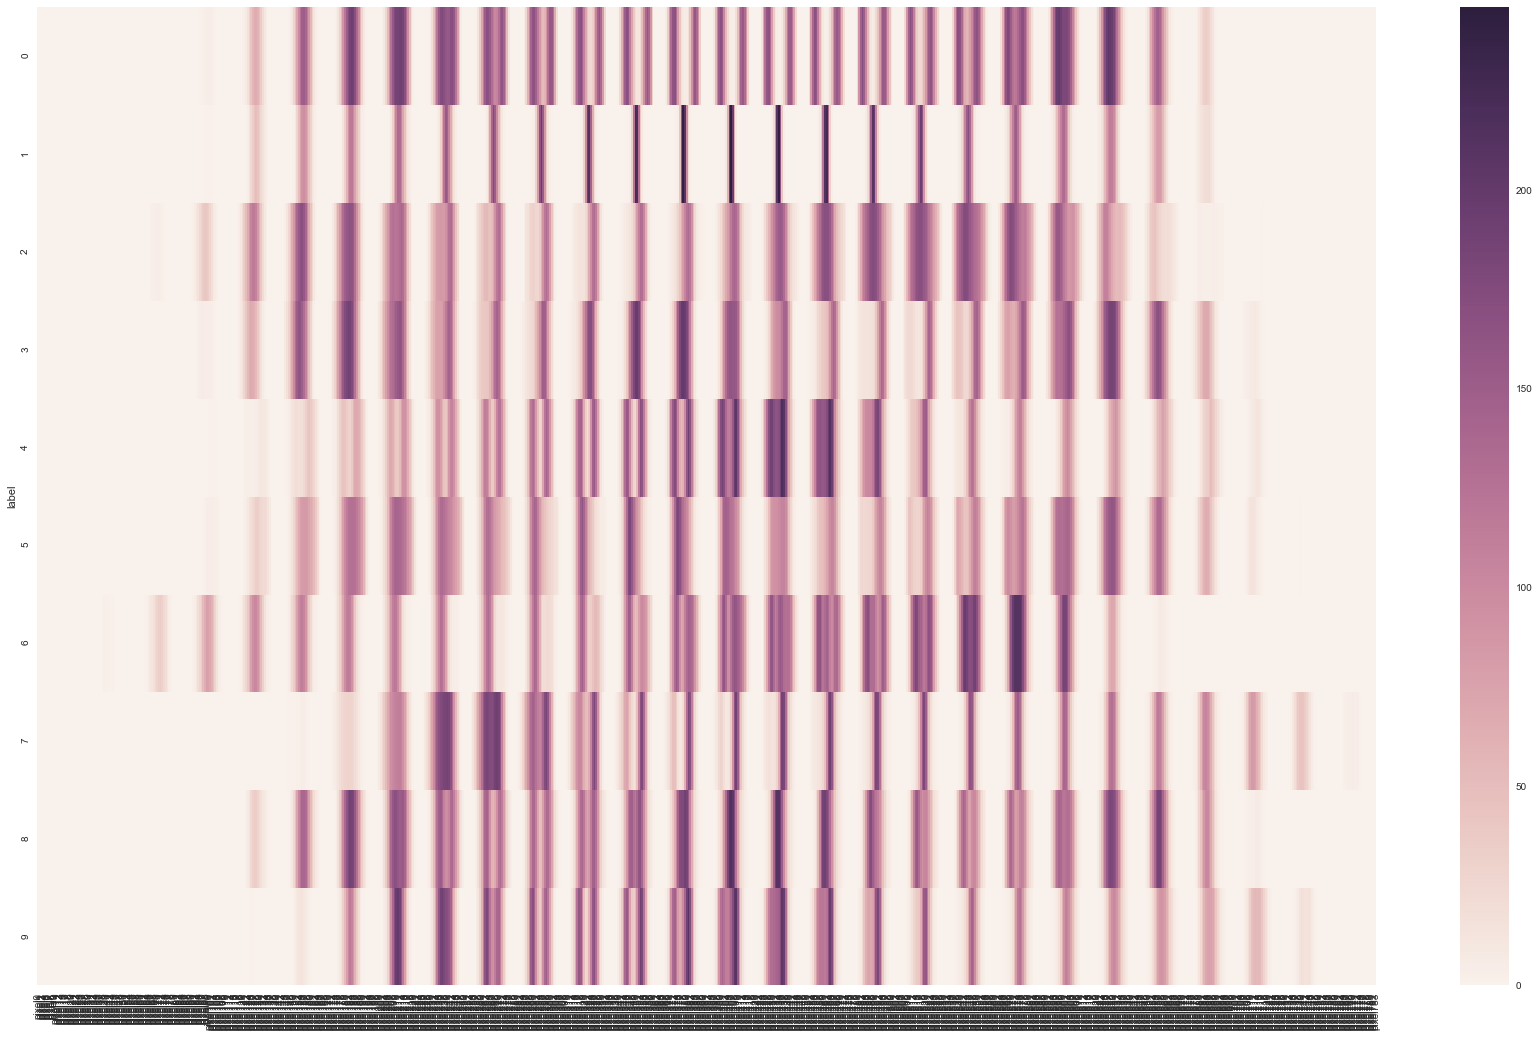

In [15]:
plt.figure(figsize=(30, 18))
sns.heatmap(digit_means)
plt.show()

Heatmap above shows the correlation between image pixel values. We cannot infer much since the number of feature are quite large.

### Data Cleaning

#### Checking Null values

In [16]:
# Inspecting data having null values
digit_recognizer.isnull().values.any()

False

There are __<span style="color:red">no null values</span>__ in the dataset

#### <span style="color:blue">Observation from dataset</span>
We observed in the dataset that:-
- There are no null values
- There is no data quality issues
- All the column names are fine

So, __<span style="color:red">No further cleaning of data is required</span>__

# 2. Data Preparation

### Dummy Variable Creation

In [17]:
digit_recognizer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 5457 to 4335
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.7 MB


All the variables are of integer type, so there is __<span style="color:red">no need for dummy variable creation</span>__

### Outlier Treatment

In [18]:
digit_recognizer.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,...,8400.000000,8400.000000,8400.000000,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0
mean,4.459643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166071,0.089881,0.030952,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.886352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.501079,4.666253,2.005824,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95%,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99%,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <span style="color:blue">Assumption</span>
The dataset consist of image expressed in pixels. So if we treat outliers than image may get affected. So it is better not to perform outlier treatment.

Based on the assumption <span style="color:red">__Outlier treatment is not required__</span>

### Train-Test Split

In [19]:
# Putting feature variable to X
X = digit_recognizer.drop("label", axis = 1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Putting response variable to y
y = digit_recognizer['label']
y.head()

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

#### train-test split

In [21]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

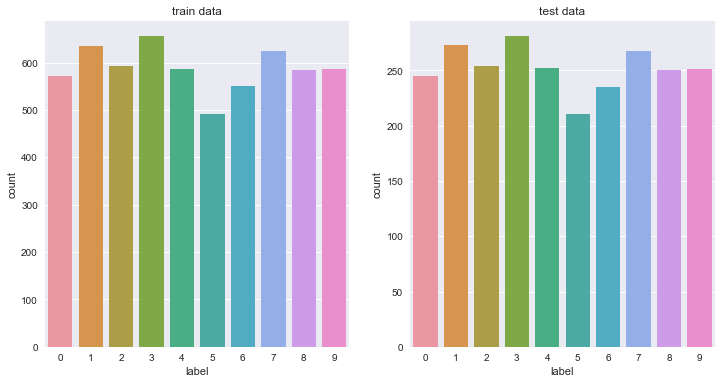

In [22]:
# Distribution of the data in the train and test data

plt.figure(figsize=(12,6))

# For train data
plt.subplot(121)
sns.countplot(y_train.to_frame(name='label').label)
plt.title('train data')

# For test data
plt.subplot(122)
sns.countplot(y_test.to_frame(name='label').label)
plt.title('test data')
plt.show()

<span style="color:red">__ Data distribution in both train and test data looks almost same__</span>

### Feature Scaling
Scaling pixel values using MinMax scaler which makes the value between 0 and 1

In [23]:
from sklearn.preprocessing import MinMaxScaler
#Scaling data
scale = MinMaxScaler()

# Scaling train data-set
X_train = scale.fit_transform(X_train)

# Scaling test data-set
X_test = scale.transform(X_test)

# 3. Model Building
Building first __linear, polynomial and non-linear(rbf) model with default hyperparameters__, and comparing the accuracies.

### Linear Model

In [24]:
# Linear Model
# Using default values
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train) # Fitting the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# Prediction on train dataset for Linear Model
y_train_pred_lm = model_linear.predict(X_train)

# Prediction on test dataset for Linear Model
y_test_pred_lm = model_linear.predict(X_test)

In [26]:
# Confusion Matrix and Accuracy of Linear Model

print("Accuracy of Linear Model", "\n")

# On train data
print("Accuracy on train data", metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred_lm))
print(metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred_lm), "\n")

# On test data
print("Accuracy on test data", metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred_lm))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_lm))

Accuracy of Linear Model 

Accuracy on train data 0.999659863946
[[571   0   0   0   0   0   0   0   0   0]
 [  0 636   0   0   0   0   0   0   0   0]
 [  0   0 592   0   0   0   0   0   0   0]
 [  0   0   0 655   0   0   0   0   1   0]
 [  0   0   0   0 587   0   0   0   0   0]
 [  0   0   0   0   0 491   0   0   0   0]
 [  0   0   0   0   0   0 550   0   0   0]
 [  0   0   0   0   0   0   0 625   0   0]
 [  0   0   0   0   0   0   0   0 585   0]
 [  0   0   0   0   0   0   0   1   0 586]] 

Accuracy on test data 0.909523809524
[[239   0   0   0   0   3   3   0   0   0]
 [  0 268   3   1   0   0   0   0   1   0]
 [  0   2 230   3   8   2   2   2   5   0]
 [  2   1   8 247   0  11   0   5   4   3]
 [  1   1   1   0 236   0   1   1   0  11]
 [  4   3   0  10   5 178   4   1   4   2]
 [  4   0   5   0   2   3 218   0   3   0]
 [  1   2   4   2   5   0   0 245   2   7]
 [  1   9   5   9   2   9   2   0 212   1]
 [  0   2   1   4  12   1   0  12   0 219]]


### Polynomial Model

In [27]:
# Polynomial model
# Using default values
model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train) # Fitting the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Prediction on train dataset for Polynomial Model
y_train_pred_poly = model_poly.predict(X_train)

# Prediction on test dataset for Polynomial Model
y_test_pred_poly = model_poly.predict(X_test)

In [29]:
# Confusion Matrix and Accuracy of Polynomial Model

print("Accuracy of Polynomial Model", "\n")

# On train data
print("Accuracy on train data:", metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred_poly))
print(metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred_poly), "\n")

# On test data
print("Accuracy on test data:", metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred_poly))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_poly))

Accuracy of Polynomial Model 

Accuracy on train data: 0.120238095238
[[ 51   0   0 520   0   0   0   0   0   0]
 [  0   0   0 636   0   0   0   0   0   0]
 [  0   0   0 592   0   0   0   0   0   0]
 [  0   0   0 656   0   0   0   0   0   0]
 [  0   0   0 587   0   0   0   0   0   0]
 [  0   0   0 491   0   0   0   0   0   0]
 [  0   0   0 550   0   0   0   0   0   0]
 [  0   0   0 625   0   0   0   0   0   0]
 [  0   0   0 585   0   0   0   0   0   0]
 [  0   0   0 587   0   0   0   0   0   0]] 

Accuracy on test data: 0.119047619048
[[ 19   0   0 226   0   0   0   0   0   0]
 [  0   0   0 273   0   0   0   0   0   0]
 [  0   0   0 254   0   0   0   0   0   0]
 [  0   0   0 281   0   0   0   0   0   0]
 [  0   0   0 252   0   0   0   0   0   0]
 [  0   0   0 211   0   0   0   0   0   0]
 [  0   0   0 235   0   0   0   0   0   0]
 [  0   0   0 268   0   0   0   0   0   0]
 [  0   0   0 250   0   0   0   0   0   0]
 [  0   0   0 251   0   0   0   0   0   0]]


### Non-linear(Rbf Kernel) Model

In [30]:
# Non-linear(rbf) model
# using rbf kernel, C=1, default value of gamma

non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train) # Fitting the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# Prediction on train dataset for Non-linear(rbf) model
y_train_pred_nlm = non_linear_model.predict(X_train)

# Prediction on test dataset for Non-linear(rbf) model
y_test_pred_nlm = non_linear_model.predict(X_test)

In [32]:
# Confusion Matrix and Accuracy of Non-linear(rbf) Model

print("Accuracy of Non-linear(rbf) Model", "\n")

# On train data
print("Accuracy on train data:", metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred_nlm))
print(metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred_nlm), "\n")

# On test data
print("Accuracy on test data:", metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred_nlm))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred_nlm))

Accuracy of Non-linear(rbf) Model 

Accuracy on train data: 0.921598639456
[[555   0   1   0   2   6   3   0   4   0]
 [  0 632   0   0   1   1   2   0   0   0]
 [  2   8 535   7  13   2   6   8  10   1]
 [  2   4   9 580   0  24   5   9  17   6]
 [  1   3   2   0 547   0   4   2   1  27]
 [  4  10   0  22   2 434  12   1   3   3]
 [  6   1   3   1   1   5 531   0   2   0]
 [  0  13   7   2  12   1   0 565   1  24]
 [  2  11   5  18   5  12   5   3 519   5]
 [  3   5   2  12  14   2   0  23   5 521]] 

Accuracy on test data: 0.905555555556
[[237   0   0   0   1   2   4   0   1   0]
 [  0 268   3   0   0   1   0   0   0   1]
 [  2   5 218   2   9   0   5   3  10   0]
 [  2   2  11 244   1   8   0   2   7   4]
 [  0   1   2   0 235   2   1   0   0  11]
 [  2   4   3  11   7 178   3   0   2   1]
 [  1   0   5   0   4   4 220   0   1   0]
 [  0   8   6   0   3   1   0 240   1   9]
 [  0   7   2  10   1   6   3   1 219   1]
 [  0   1   0   5  10   1   0  10   1 223]]


In [33]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_nlm))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       245
          1       0.91      0.98      0.94       273
          2       0.87      0.86      0.87       254
          3       0.90      0.87      0.88       281
          4       0.87      0.93      0.90       252
          5       0.88      0.84      0.86       211
          6       0.93      0.94      0.93       235
          7       0.94      0.90      0.92       268
          8       0.90      0.88      0.89       250
          9       0.89      0.89      0.89       251

avg / total       0.91      0.91      0.91      2520



#### <span style="color:blue">Summary of Linear, Polynomial and Non-Linear model</span>
- __For Linear Model__
    - Accuracy on train data - 0.99 and test data - 0.90.
    - So we can say that linear model overfits the data.
    
    
- __For Polynomial Model__
    - Accuracy on train data - 0.120 and test data - 0.119.
    - Clearly the polynomial model is not a good choice, since train and test accuracy is very low.


- __For Non-Linear(Rbf kernel) Model__
    - Accuracy on train data - 0.92 and test data - 0.90.
    - Train and test accuracy is more than 0.90 (i.e. 90%) which is good.
    - We observe that train and test accuracy for non-linear model is fairly close means it is not overfitting.

So, <span style="color:red">__Non-linear(Rbf kernel) model is best choice__</span> for handwritten digit recognition.

### Grid Search: Hyperparameter Tuning

- Tuning model to find the optimal values of C and gamma corresponding to an RBF(Non-linear) kernel. 
- Using 5-fold cross validation, with different values of C and gamma.

In [34]:
# Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Setting the parameters for cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5, 10, 50]}]


# Specifying kernel to be used for model building
model = SVC(kernel="rbf")

# Setting up GridSearchCV
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# Fitting the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [35]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,21.530190,8.826328,0.955782,0.999235,5,0.01,"{'C': 5, 'gamma': 0.01}",1,0.954932,0.999362,...,0.965986,0.998937,0.948129,0.999150,0.951531,0.999787,1.512585,0.277058,0.006132,0.000318
1,25.729246,8.461169,0.921088,0.944643,5,0.001,"{'C': 5, 'gamma': 0.001}",6,0.926871,0.944728,...,0.927721,0.943878,0.914966,0.945366,0.915816,0.945153,0.278726,0.314179,0.005362,0.000580
2,60.587992,13.479496,0.884184,0.893027,5,0.0001,"{'C': 5, 'gamma': 0.0001}",9,0.892007,0.890944,...,0.896259,0.892219,0.872449,0.894345,0.882653,0.893282,1.587196,0.170624,0.008844,0.001306
3,22.933957,8.001030,0.955102,0.999872,10,0.01,"{'C': 10, 'gamma': 0.01}",3,0.953231,1.000000,...,0.965986,0.999787,0.949830,0.999787,0.948980,1.000000,0.748184,0.459933,0.006212,0.000104
4,20.711681,7.470264,0.924490,0.957568,10,0.001,"{'C': 10, 'gamma': 0.001}",5,0.926871,0.958759,...,0.935374,0.956633,0.918367,0.959184,0.920918,0.956207,0.496878,0.220261,0.006118,0.001184


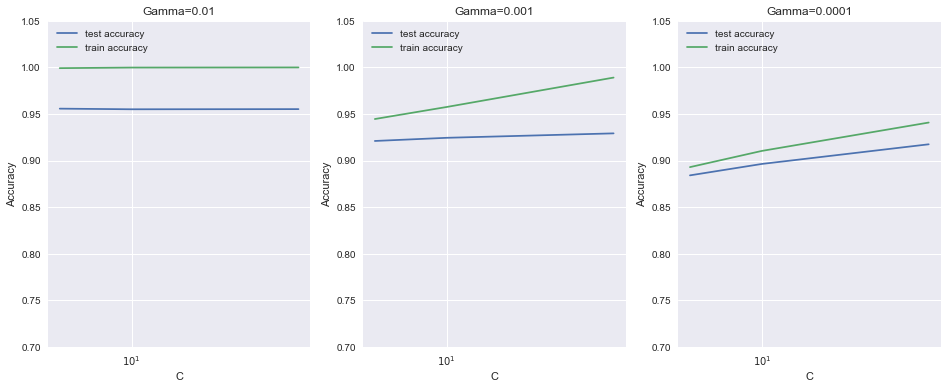

In [36]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# Plots for visualizing C and gamma performance
plt.figure(figsize=(16,6))

# For gamma = 0.01 and different values of C
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# For gamma = 0.001 and different values of C
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# For gamma = 0.0001 and different values of C
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

#### Observation from above plots:

- For gamma = 0.01, the model is achieving almost 100% accuracy on the training data, when C > 10 the test score is decreasing or flatening.


- For gamma = 0.001, the training and test scores are widening significantly, i.e. the model starts to overfit for value C > 10


- For gamma=0.0001, the accuracy is about 90% for train and less than 90% for test and perform consistently till C = 10. 
  For C > 10 model starts to overfit.

#### Optimal accuracy and hyperparameter values

In [37]:
# Optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.95578231292517 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


### Building and Evaluating the Final Model

Building and evaluating the <span style="color:blue">__final model using Non-linear (rbf) kernel __</span> with optimal values of <span style="color:blue">__C=5 and gamma = 0.01__</span>, i.e. the model with best test accuracy.

#### Model building

In [38]:
# Model with optimal hyperparameters
model_final = SVC(C=5, gamma=0.01, kernel="rbf")

model_final.fit(X_train, y_train) # Fitting the model

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
# Prediction on train dataset for Non-linear model
y_train_pred_fin = model_final.predict(X_train)

# Prediction on test dataset for Non-linear model
y_test_pred_fin = model_final.predict(X_test)

#### Model evaluation

In [40]:
# On train
print("Accuracy on train data", metrics.accuracy_score(y_train, y_train_pred_fin))
print(metrics.confusion_matrix(y_train, y_train_pred_fin), "\n")

# On test
print("Accuracy on test data", metrics.accuracy_score(y_test, y_test_pred_fin))
print(metrics.confusion_matrix(y_test, y_test_pred_fin))

Accuracy on train data 0.999319727891
[[571   0   0   0   0   0   0   0   0   0]
 [  0 636   0   0   0   0   0   0   0   0]
 [  0   0 592   0   0   0   0   0   0   0]
 [  0   0   0 656   0   0   0   0   0   0]
 [  0   0   0   0 585   0   0   1   0   1]
 [  0   0   0   0   0 491   0   0   0   0]
 [  0   0   0   0   0   0 550   0   0   0]
 [  0   0   0   0   2   0   0 623   0   0]
 [  0   0   0   0   0   0   0   0 585   0]
 [  0   0   0   0   0   0   0   0   0 587]] 

Accuracy on test data 0.95
[[242   0   0   0   0   1   2   0   0   0]
 [  0 268   4   1   0   0   0   0   0   0]
 [  1   0 241   2   4   0   1   1   4   0]
 [  2   1   5 261   0   3   0   2   3   4]
 [  0   0   2   0 242   0   1   0   0   7]
 [  0   0   3   5   2 197   1   0   1   2]
 [  3   0   5   0   2   2 222   0   1   0]
 [  0   3   3   0   0   0   0 259   0   3]
 [  0   5   2   6   1   4   2   1 228   1]
 [  0   1   0   5   5   0   0   6   0 234]]


#### Actual and Predicted Recognised handwritten digits

In [41]:
y_test_df = pd.DataFrame(data = y_test)
y_test_df.head()

,label
4029,3
24139,9
4165,1
25346,7
8726,1


In [42]:
y_pred_df = pd.DataFrame(data = y_test_pred_fin, columns=['identified_label'], index=y_test_df.index)
y_pred_df.head()

,identified_label
4029,3
24139,9
4165,1
25346,7
8726,1


In [43]:
digit_predict = pd.concat(objs = [y_test_df,y_pred_df], axis=1).reset_index()
digit_predict= digit_predict.rename(columns={ 'index' : 'image_id'})
digit_predict.head(10)

,image_id,label,identified_label
0,4029,3,3
1,24139,9,9
2,4165,1,1
3,25346,7,7
4,8726,1,1
5,16435,3,3
6,6225,2,2
7,13032,1,1
8,27749,3,3
9,10308,2,2


In [44]:
# On test
confu_matrix = metrics.confusion_matrix(y_test, y_test_pred_fin)
print("Accuracy on test data", metrics.accuracy_score(digit_predict.label, digit_predict.identified_label))
print(confu_matrix)

Accuracy on test data 0.95
[[242   0   0   0   0   1   2   0   0   0]
 [  0 268   4   1   0   0   0   0   0   0]
 [  1   0 241   2   4   0   1   1   4   0]
 [  2   1   5 261   0   3   0   2   3   4]
 [  0   0   2   0 242   0   1   0   0   7]
 [  0   0   3   5   2 197   1   0   1   2]
 [  3   0   5   0   2   2 222   0   1   0]
 [  0   3   3   0   0   0   0 259   0   3]
 [  0   5   2   6   1   4   2   1 228   1]
 [  0   1   0   5   5   0   0   6   0 234]]


<span style="color:blue">__Accuracy on test data obtained is 0.95__</span>

#### Precision and Recall on predicted values of test data

In [45]:
recall = np.diag(confu_matrix) / np.sum(confu_matrix, axis = 1)
precision = np.diag(confu_matrix) / np.sum(confu_matrix, axis = 0)

In [46]:
print("recall:", recall)
print("\n")
print("precision:", precision)

recall: [ 0.9877551   0.98168498  0.9488189   0.92882562  0.96031746  0.93364929
  0.94468085  0.96641791  0.912       0.93227092]


precision: [ 0.97580645  0.96402878  0.90943396  0.93214286  0.9453125   0.95169082
  0.96943231  0.96282528  0.96202532  0.93227092]


<span style="color:blue">__For all the digits from 0-9 the recall and precision is more than 90%__</span>

# 4. Conclusion

- The original dataset given was of 42000 images. Since it was computationally time consuming, we took sample of about 20% of original dataset and build model using SVM with optimal value of C and gamma.


- We build model using linear, polynomial and non-linear(rbf kernel) model and found the __non-linear(rbf kernel) model__ to be best suited for predicting hand written digit.


- __We obtained optimal values of hyperparameters C and gamma to build non-linear (rbf kernel) model. We found optimal values as:__
     - __<span style="color:blue">C = 5</span>__
     - __<span style="color:blue">gamma = 0.01</span>__


- __Using the Rbf kernel(non-linear) model and C=5 and gamma = 0.01, we build model and the accuracy obtained were:__
    - __<span style="color:blue">For train data - 0.99__</span>
    - __<span style="color:blue">For test data - 0.95__</span>


- We calculated accuracy on 20% of original data. __Test accuracy expected to increase once we perform model evaluation on full MNSIT dataset.__